In [1]:
import dash
from dash.dependencies import Input, Output
import dash_bootstrap_components as dbc
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
from io import StringIO
import requests
from datetime import datetime, timedelta
s = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTx84fsp1moplR6uxUzYhMRxicBwJjxTGeW2kNyngbUme5r6kzhgWe8GMVC_Ve1QsiQ23_0HzRmdxBV/pub?gid=205792249&single=true&output=csv'
r = requests.get(s)
data = r.text
global df
df = pd.read_csv(StringIO(data))

In [2]:
df.head()

,Timestamp,What did you eat,Estimate the amount of calories you ate.
0,11/7/2019 22:10:33,chocolate pieces,200.0
1,11/7/2019 22:10:45,chicken wings,1000.0
2,11/7/2019 22:10:51,beer,100.0
3,11/7/2019 22:10:57,beer,100.0
4,11/7/2019 22:11:09,vegetable and dip,200.0


In [3]:
import calmap


In [4]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

#####
# converts data to daily format
daily_calories = df.resample('D').sum()
daily_calories.columns = ['sum(calories)',]
daily_calories.sort_index(inplace=True)

In [5]:
# daily_calories

In [6]:
# year_df = pd.date_range('1/1/2019', periods=365, freq='D')
# year_df = pd.DataFrame(index=year_df)

In [7]:
# test = year_df.join(daily_calories)

In [8]:
# test_series = pd.Series(test.values[:,0], index=test.index)

In [9]:
# import numpy as np
# all_days = pd.date_range('1/15/2014', periods=700, freq='D')
# days = np.random.choice(all_days, 500)
# events = pd.Series(np.random.randn(len(days)), index=days)

/home/john/anaconda3/envs/research/lib/python3.6/site-packages/calmap/__init__.py:221: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



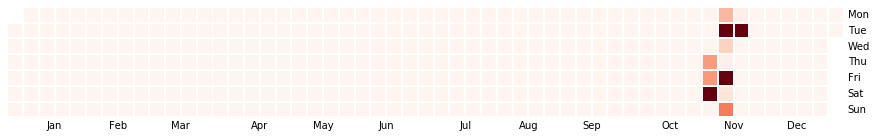

In [10]:
import matplotlib.pyplot as plt
import numpy as np
year_df = pd.date_range('1/1/2019', periods=365, freq='D')
year_df = pd.DataFrame(index=year_df)
test = year_df.join(daily_calories)
test_series = pd.Series(test.values[:,0], index=test.index)
fig, ax = plt.subplots(figsize=(15, 5))
calmap.yearplot(test_series, year=2019, ax=ax, cmap='Reds', vmin=2000, vmax=3000)
fig.savefig('assets/calendar.png', bbox_inches='tight', dpi=75)